In [1]:
lcat <- read.csv("lcat.csv")
lcax <- read.csv("lcax.csv")
as2000 <- read.csv("AgeStr2000.csv")
pop <- read.csv("Pop.csv")

In [2]:
sum(as2000$N);pop$Pop[pop$Year==2000]

[1] 0

[1] 22276672

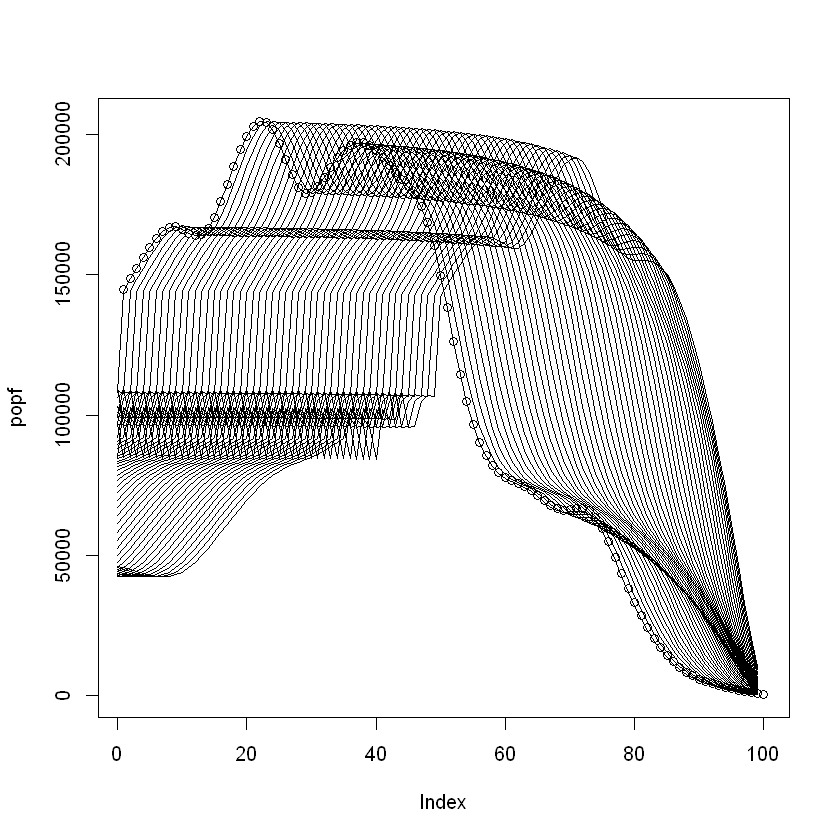

In [9]:
mfraito <- c(1.05, 1)/2.05
nbir <- c()
ndea <- c()
npop <- c()
popf <- as2000[1:100, 'Weight']
popm <- as2000[101:200, 'Weight']

plot(popf)
for(yr in 2000:2049) {
    drf <- exp(lcax$ax_f+lcax$bx_f*lcat$female[lcat$Year == yr])
    drm <- exp(lcax$ax_m+lcax$bx_m*lcat$male[lcat$Year == yr])
    dea <- sum(popf*pexp(1, drf) + popf*pexp(1, drf))
    popf <- popf*(1-pexp(1, drf))
    popm <- popm*(1-pexp(1, drm))
    dea <- dea + popf[100] + popm[100]
    popf <- c(0, popf[-100])
    popm <- c(0, popm[-100])
    bir <- max(pop$Pop[pop$Year==(yr+1)] - sum(popf+popm), 0)
    bir <- min(bir, 0.010*sum(popf+popm))
    popf[1] <- bir*mfraito[2]
    popm[1] <- bir*mfraito[1]
    nbir <- c(nbir, bir)
    ndea <- c(ndea, dea)
    npop <- c(npop, sum(popf+popm))
    lines(0:99, popf)
}

nbir <- smooth.spline(2001:2050, nbir)$y
ndea <- smooth.spline(2001:2050, ndea)$y

In [ ]:
mfraito <- c(1.05, 1)/2.05
npop <- c()
popf <- as2000[1:100, 'N']
popm <- as2000[101:200, 'N']

plot(popf)
for(yr in 2000:2049) {
    drf <- exp(lcax$ax_f+lcax$bx_f*lcat$female[lcat$Year == yr])
    drm <- exp(lcax$ax_m+lcax$bx_m*lcat$male[lcat$Year == yr])
    popf <- popf*(1-pexp(1, drf))
    popm <- popm*(1-pexp(1, drm))
    popf <- c(0, popf[-100])
    popm <- c(0, popm[-100])
    bir <- nbir[yr-1999]
    popf[1] <- bir*mfraito[2]
    popm[1] <- bir*mfraito[1]
    npop <- c(npop, sum(popf+popm))
    lines(0:99, popf)
}


In [10]:
nd <- data.frame(Year=2000:2049, N=ndea)
nd <- rbind(nd, c(2050, nd[50,2]))
write.csv(nd, "NumDea.csv", row.names = F)

In [11]:
nb <- data.frame(Year=2000:2049, N=nbir)
nb <- rbind(nb, c(2050, nb[50,2]))
write.csv(nb, "NumBir.csv", row.names = F)

In [ ]:
yr = 2030
p <- 1
ps <- c()
for (i in 1:100) {
    dr <- exp(lcax$ax_m+lcax$bx_m*lcat$male[lcat$Year == yr])[i]
    p <- p*(1-pexp(1, dr))
    ps <- c(ps, p)
}


In [ ]:
hist(splinefun(ps, 0:99)(runif(1000)), breaks=20)

In [ ]:
min(splinefun(ps, 0:99)(runif(1000, 0, ps[80])))